In [1]:
library(ggplot2)
library(cowplot)
library(dplyr)
library(ggthemes)


********************************************************
Note: As of version 1.0.0, cowplot does not change the
  default ggplot2 theme anymore. To recover the previous
  behavior, execute:
  theme_set(theme_cowplot())
********************************************************


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Attaching package: ‘ggthemes’

The following object is masked from ‘package:cowplot’:

    theme_map



In [2]:
mydir = "/hps/nobackup2/stegle/users/acuomo/all_scripts/struct_LMM2/sc_neuroseq/da_coloc_GxC/"
mydirtop = paste0(mydir, "input_files_SLC35E2-1_1660978_C_A_top30quantile_d52/")
filename_top = paste0(mydirtop,"results/qtl_results_all.txt")
mydirbottom = paste0(mydir, "input_files_SLC35E2-1_1660978_C_A_bottom30quantile_d52/")
filename_bottom = paste0(mydirbottom,"/results/qtl_results_all.txt")
df_top = read.csv(filename_top,sep="\t")
df_to_plot1 = df_top
m1 = min(df_to_plot1$p_value)
df_bottom = read.csv(filename_bottom,sep="\t")
df_to_plot2 = df_bottom
m2 = min(df_to_plot2$p_value)
m = -log10(min(m1,m2))+1
p_top = ggplot(df_to_plot1, aes(x=snp_position,y=-log10(p_value))) + geom_point(col="cornflowerblue") + theme_classic() + ylim(c(0,m))
p_bottom = ggplot(df_to_plot2, aes(x=snp_position,y=-log10(p_value))) + geom_point(col="firebrick") + theme_classic() + ylim(c(0,m))
options(repr.plot.width = 7, repr.plot.height = 5)
# plot_grid(p_bottom, p_top, ncol=2)

In [3]:
df_gwas_filename = "/hps/nobackup2/stegle/users/acuomo/all_scripts/struct_LMM2/sc_neuroseq/gwas_insomnia_awith_pos.csv"
df_gwas = read.csv(df_gwas_filename, row.names=1)
head(df_gwas)

,variant,minor_allele,minor_AF,expected_min_category_minor_AC,low_confidence_variant,n_complete_samples,AC,ytx,beta,se,tstat,pval,pos,chr,snp_id
0,1:15791:C:T,T,5.43548e-09,4.95716e-06,True,360738,3.92157e-03,7.84314e-03,21.65330000,1.81002e+02,0.119630,0.9047760,15791,1,1_15791_C_T
1,1:69487:G:A,A,5.75617e-06,5.24963e-03,True,360738,4.15294e+00,7.29804e+00,-0.30861000,3.54539e-01,-0.870454,0.3840530,69487,1,1_69487_G_A
2,1:69569:T:C,C,1.87959e-04,1.71419e-01,True,360738,1.35608e+02,2.81702e+02,0.03901000,6.35850e-02,0.613510,0.5395400,69569,1,1_69569_T_C
3,1:139853:C:T,T,5.66921e-06,5.17032e-03,True,360738,4.09020e+00,7.18039e+00,-0.30638500,3.54550e-01,-0.864151,0.3875050,139853,1,1_139853_C_T
4,1:692794:CA:C,C,1.10645e-01,1.00908e+02,False,360738,7.98278e+04,1.62827e+05,-0.00532662,2.93859e-03,-1.812640,0.0698875,692794,1,1_692794_CA_C
5,1:693731:A:G,G,1.15844e-01,1.05649e+02,False,360738,8.35783e+04,1.70469e+05,-0.00509511,2.77643e-03,-1.835130,0.0664873,693731,1,1_693731_A_G


In [4]:
snps1 = as.character(df_gwas$snp_id)

In [5]:
snps2 = df_bottom$snp_id

In [6]:
# length(snps1)
# length(snps2)
# length(snps1[snps1 %in% snps2])

In [7]:
common_snps = snps1[snps1 %in% snps2]
df0 = df_bottom[df_bottom$snp_id %in% common_snps,]
df1 = df_gwas[df_gwas$snp_id %in% common_snps,]

In [8]:
df2 = inner_join(df0,df1, by="snp_id")

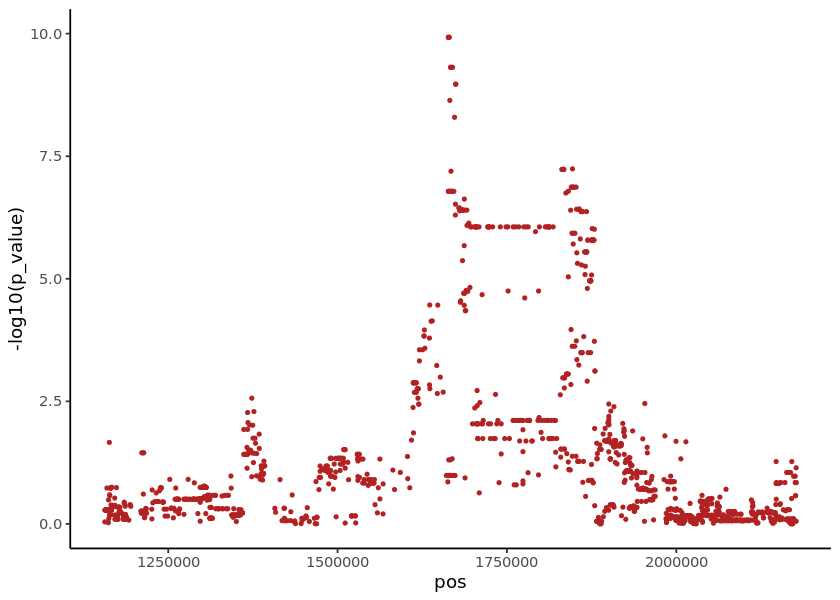

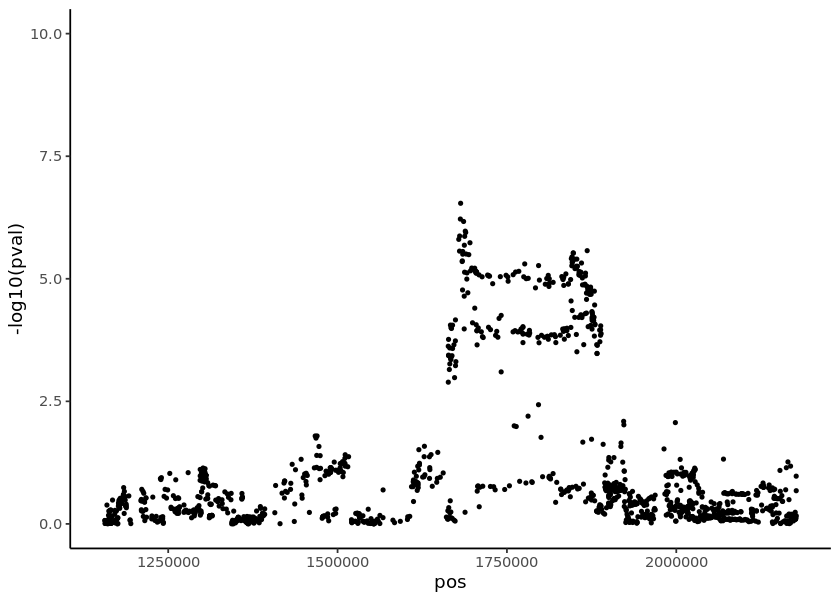

In [9]:
ggplot(df2, aes(x=pos, y = -log10(p_value))) + geom_point(col="firebrick",size=0.8) + theme_classic() + ylim(c(0,10))
ggplot(df2, aes(x=pos, y = -log10(pval))) + geom_point(col="black",size=0.8) + theme_classic() + ylim(c(0,10))

[1] 0.8352981

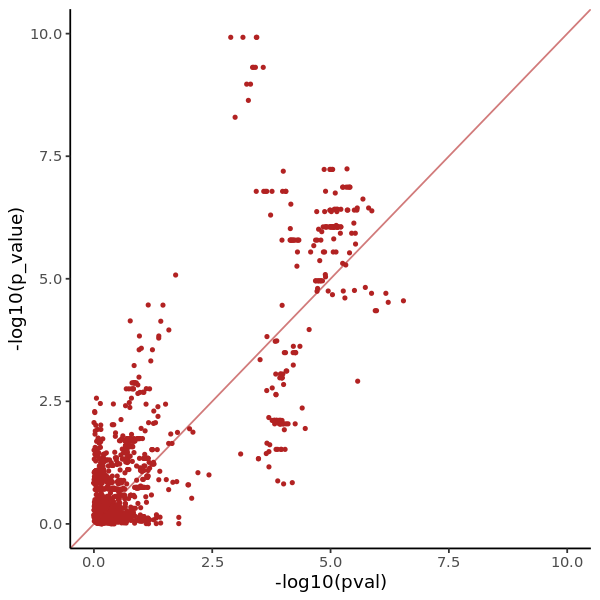

In [10]:
options(repr.plot.width = 5, repr.plot.height = 5)
cor(-log10(df2$pval), -log10(df2$p_value))
ggplot(df2, aes(x=-log10(pval), y = -log10(p_value))) + geom_point(col="firebrick",size=0.8) + theme_classic() +
    xlim(c(0,10)) + ylim(c(0,10)) + geom_abline(slope = 1, alpha=0.6, col="firebrick")

[1] -0.6648826

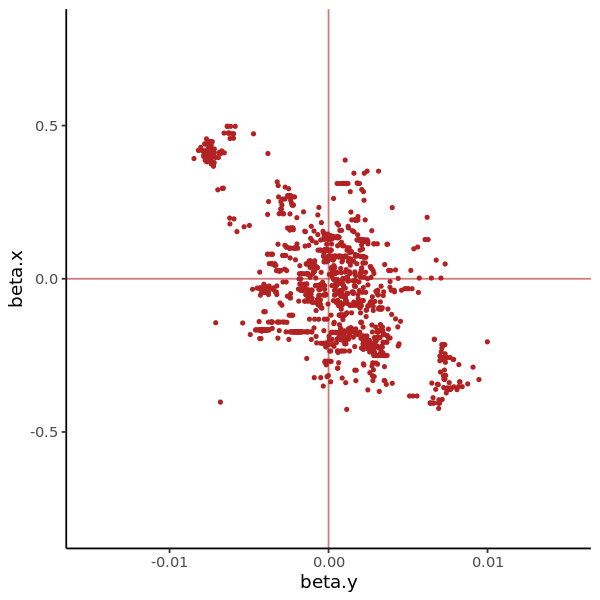

In [11]:
cor(df2$beta.y, df2$beta.x)
ggplot(df2, aes(x=beta.y, y = beta.x)) + geom_point(col="firebrick", size=0.8) + theme_classic() +
    ylim(c(-0.8,0.8)) + xlim(c(-0.015,0.015)) + 
    geom_vline(xintercept = 0, alpha=0.6, col="firebrick") + geom_hline(yintercept = 0, alpha=0.6, col="firebrick")

In [12]:
snps3 = df_top$snp_id

In [13]:
common_snps = snps1[snps1 %in% snps3]
df0 = df_top[df_top$snp_id %in% common_snps,]
df1 = df_gwas[df_gwas$snp_id %in% common_snps,]

In [14]:
df2 = inner_join(df0,df1, by="snp_id")

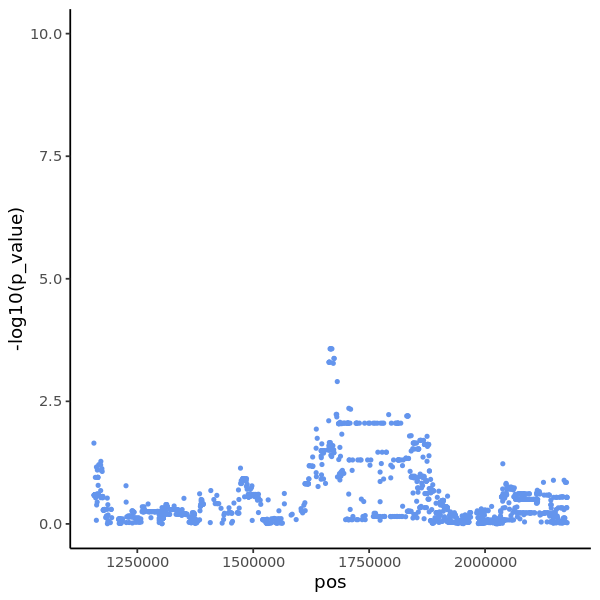

In [15]:
ggplot(df2, aes(x=pos, y = -log10(p_value))) + geom_point(col="cornflowerblue",size=0.8) + theme_classic() + ylim(c(0,10))

[1] 0.5356265

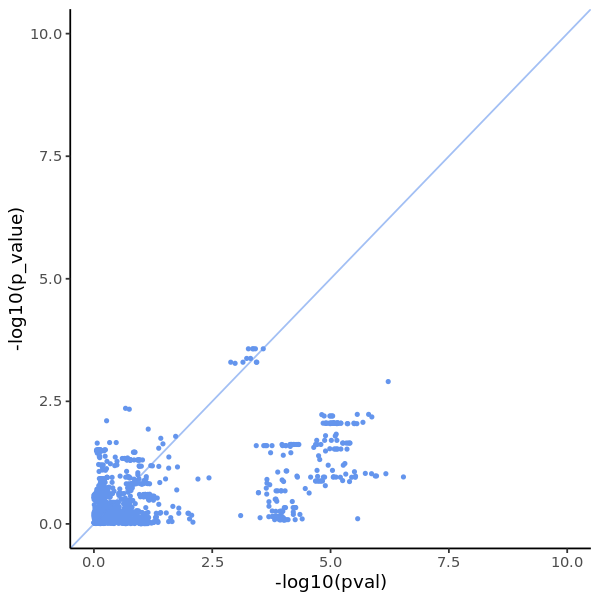

In [16]:
options(repr.plot.width = 5, repr.plot.height = 5)
cor(-log10(df2$pval), -log10(df2$p_value))
ggplot(df2, aes(x=-log10(pval), y = -log10(p_value))) + geom_point(col="cornflowerblue", size=0.8) + theme_classic() +
    xlim(c(0,10)) + ylim(c(0,10)) + geom_abline(slope = 1, alpha=0.6, col="cornflowerblue")

[1] -0.4456157

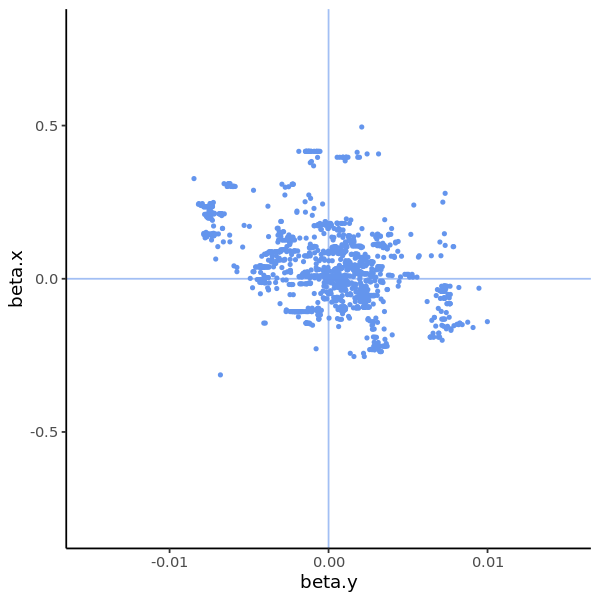

In [17]:
cor(df2$beta.y, df2$beta.x)
ggplot(df2, aes(x=beta.y, y = beta.x)) + geom_point(col="cornflowerblue", size=0.8) + theme_classic() +
    ylim(c(-0.8,0.8)) + xlim(c(-0.015,0.015)) + 
    geom_vline(xintercept = 0, alpha=0.6, col="cornflowerblue") + geom_hline(yintercept = 0, alpha=0.6, col="cornflowerblue")

In [ ]:
filename1 = "/nfs/leia/research/stegle/dseaton/hipsci/singlecell_neuroseq/data/data_processed/pool1_17_D52/qtl_analysis/eqtl_discovery_separated_by_treatment/input_files_untreated/celltype_DA/summary_stats/pool1_17_D52.DA.qtl_results_all.txt"
df_d52 = read.csv(filename1,sep="\t")

In [ ]:
head(df_d52,2)
df_d52 = df_d52[df_d52$feature_id == "ENSG00000215790",]
snps4 = df_d52$snp_id

In [ ]:
common_snps = snps1[snps1 %in% snps4]
df0 = df_d52[df_d52$snp_id %in% common_snps,]
df1 = df_gwas[df_gwas$snp_id %in% common_snps,]

In [ ]:
col_day52 = canva_pal("Cheerful brights")(4)[3]

In [ ]:
df2 = inner_join(df0,df1, by="snp_id")

In [ ]:
ggplot(df2, aes(x=pos, y = -log10(p_value))) + geom_point(col=col_day52,size=0.8) + theme_classic() #+ ylim(c(0,10))


In [ ]:
options(repr.plot.width = 5, repr.plot.height = 5)
cor(-log10(df2$pval), -log10(df2$p_value))
ggplot(df2, aes(x=-log10(pval), y = -log10(p_value))) + geom_point(col=col_day52, size=0.8) + theme_classic() +
    xlim(c(0,10)) + ylim(c(0,10)) + geom_abline(slope = 1, alpha=0.6, col=col_day52)

In [ ]:
cor(df2$beta.y, df2$beta.x)
ggplot(df2, aes(x=beta.y, y = beta.x)) + geom_point(col=col_day52, size=0.8) + theme_classic() +
    ylim(c(-0.8,0.8)) + xlim(c(-0.015,0.015)) + 
    geom_vline(xintercept = 0, alpha=0.6, col=col_day52) + geom_hline(yintercept = 0, alpha=0.6, col=col_day52)